In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("BrentOilPrices.csv", parse_dates=True, index_col=0)

In [3]:
data = df
data.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [4]:
data.isna().sum()
# as we can see there are no null values

Price    0
dtype: int64

In [5]:
#lets now see the minimum and the maximum value in the dataset
data["Price"].max()

143.95

In [6]:
data["Price"].min()
# as we can see there is a differnece between the most and the leat price

9.1

<AxesSubplot:xlabel='Date'>

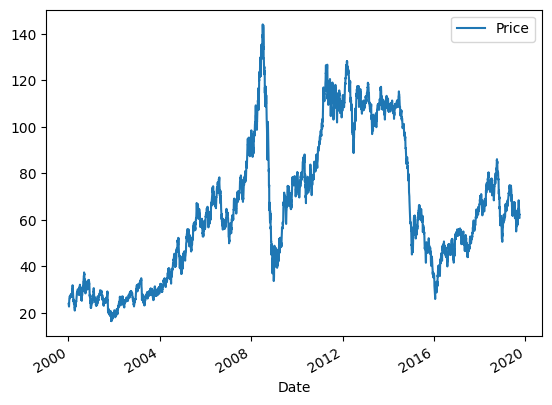

In [7]:
data['1999-12-31':].plot()

In [8]:
#CALCULATIND 3DAY AVERAGE
data["3day_AVG"] = data["Price"].rolling(window = 3).mean()
data["3day_AVG"].isna().sum()

data.head()
# as we can see there are only 2 null values so lets just drop them

,Price,3day_AVG
Date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,NaN
1987-05-22,18.55,18.543333
1987-05-25,18.60,18.533333
1987-05-26,18.63,18.593333


In [9]:
data = data[~data["3day_AVG"].isna()]
data.isna().sum()

Price       0
3day_AVG    0
dtype: int64

<AxesSubplot:xlabel='Date'>

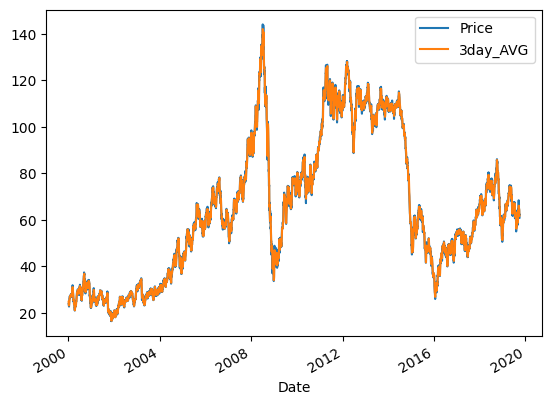

In [10]:
data['1999-12-31':].plot()

In [11]:
data["9day_AVG"] = data["Price"].rolling(window = 9).mean()
data["9day_AVG"].isna().sum()

data

C:\Users\HP\AppData\Local\Temp\ipykernel_3880\1074271216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["9day_AVG"] = data["Price"].rolling(window = 9).mean()


,Price,3day_AVG,9day_AVG
Date,,,
1987-05-22,18.55,18.543333,NaN
1987-05-25,18.60,18.533333,NaN
1987-05-26,18.63,18.593333,NaN
1987-05-27,18.60,18.610000,NaN
1987-05-28,18.60,18.610000,NaN
...,...,...,...
2019-09-24,64.13,64.673333,64.286667
2019-09-25,62.41,63.733333,64.470000
2019-09-26,62.08,62.873333,64.562222


In [12]:
data = data[~data["9day_AVG"].isna()]
data.isna().sum()

Price       0
3day_AVG    0
9day_AVG    0
dtype: int64

<AxesSubplot:xlabel='Date'>

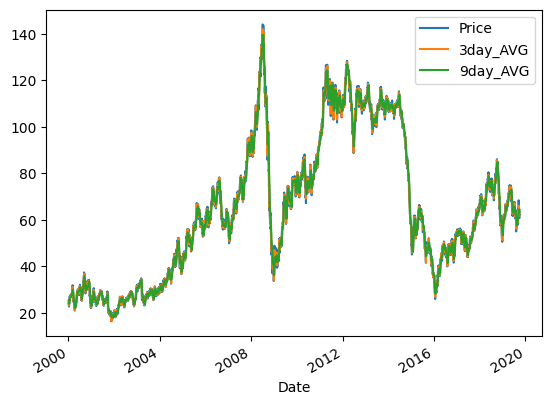

In [13]:
data['1999-12-31':].plot()

In [14]:
# LINEAR REGRESSION

In [15]:
X = data[["3day_AVG", "9day_AVG"]]
y = data[["Price"]]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict_train = lr.predict(X_train)
y_predict_test = lr.predict(X_test)


In [18]:
r2_train = r2_score(y_train, y_predict_train)
r2_train


0.9994329149219131

In [19]:
mse_train = mean_squared_error(y_train, y_predict_train)
mse_train

0.5965390538714661

In [20]:
r2_test = r2_score(y_test, y_predict_test)
r2_test


0.9995200016971956

In [21]:
mse_test = mean_squared_error(y_test, y_predict_test) 
mse_test

0.5386305623276493

In [22]:
# plt.scatter(X_test["3day_AVG"], y_test,  color='black')
# plt.plot(X_test["3day_AVG"], y_predict_test, color='green')
# plt.show()

In [23]:
# plt.scatter(X_test["9day_AVG"], y_test,  color='black')
# plt.plot(X_test["9day_AVG"], y_predict_test, color='green')
# plt.show()

In [24]:
X_test

,3day_AVG,9day_AVG
Date,,
2000-08-21,30.936667,29.806667
1994-10-27,16.813333,16.440000
1991-08-15,19.326667,19.465556
1990-10-09,39.716667,38.972222
2004-09-14,41.000000,40.934444
...,...,...
1998-04-30,13.920000,13.736667
1990-05-07,15.720000,16.227778
2008-09-18,87.610000,93.297778


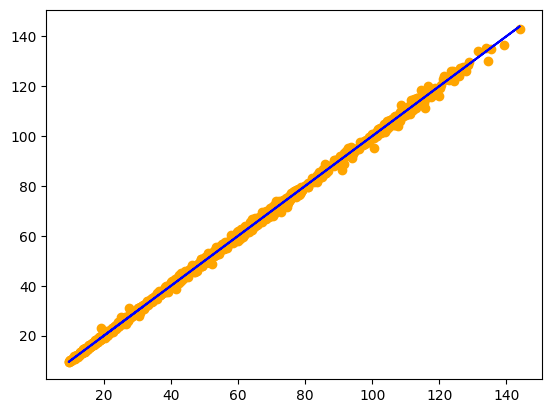

In [25]:
plt.scatter(y_test, y_predict_test,  color='orange')
plt.plot(y_test, y_test, color='blue')
plt.show()

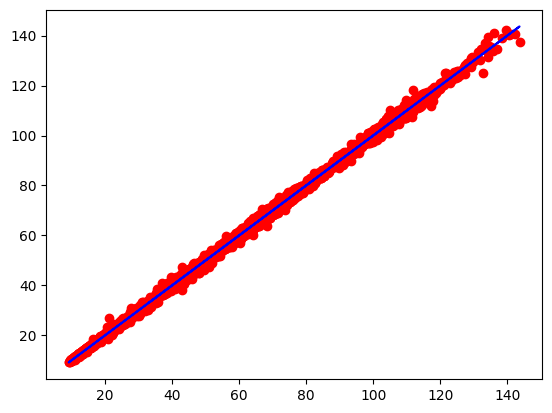

In [26]:
plt.scatter(y_train, y_predict_train,  color='red')
plt.plot(y_train, y_train, color='blue')
plt.show()

In [27]:
alpha = lr.intercept_
alpha

array([0.02745129])

In [28]:
beta = lr.coef_[0]
beta

array([ 1.21780986, -0.21850866])